#Чем думает рыба?

In [1]:
import os
import numpy
def parse(line):
    numbers =line.split(" ")
    return map(int,numbers[:2]), numpy.array(map(float, numbers[2:]))
with open("zebrafish.txt") as fdata:
    sdata = fdata.read().split("\n")[:-1]
    data = map(parse,sdata)

In [2]:
timeSeries = numpy.array([i[1] for i in data])
timeSeries.shape

(46460, 240)

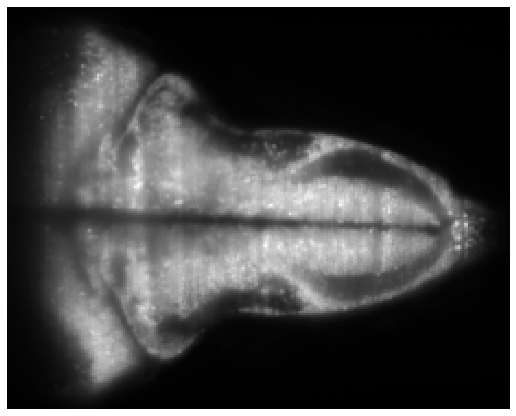

In [14]:
from zebrafish_drawing_factory import draw_component

draw_component(timeSeries[:,0])

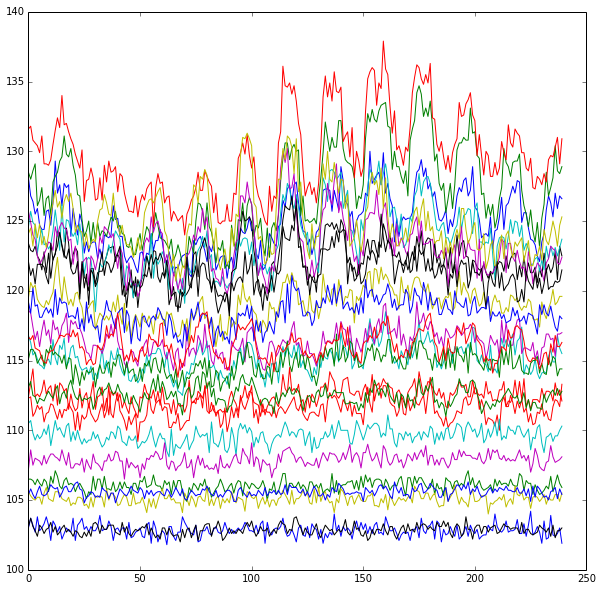

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,10])
for i in range(0,240,10):
    plt.plot(range(240),timeSeries[i])


#Поищем характерные группы нейронов

In [9]:
from sklearn.decomposition import PCA

preprocessor = PCA()
preprocessor.fit(timeSeries)

PCA(copy=True, n_components=None, whiten=False)

In [10]:
timeSeries_pca = preprocessor.transform(timeSeries)

#посмотрим, где у рыбы какие нейроны

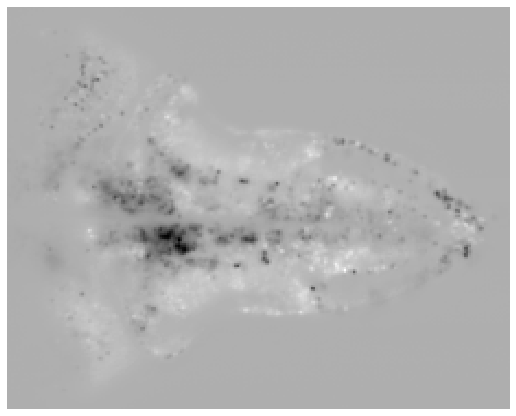

In [11]:
draw_component(timeSeries_pca[:,1])

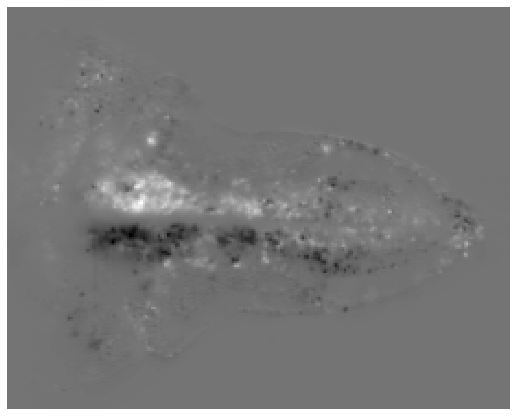

In [12]:
draw_component(timeSeries_pca[:,2])

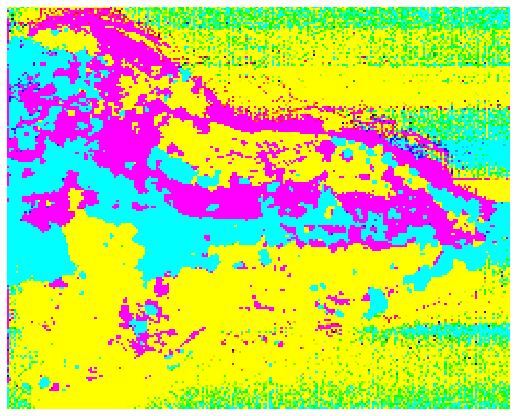

In [13]:
from zebrafish_drawing_factory import draw_components

draw_components(timeSeries_pca[:,1],timeSeries_pca[:,2])

#Поищем фичи

In [15]:
def extract_features(impulses):
    features = []
    features = numpy.fft.fft(impulses)
    return features

In [37]:
timeSeries_features = numpy.array(map(extract_features, timeSeries)).astype(float)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [36]:
ttimeSeries_features.astype(float)[:10]

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


array([[  2.46835000e+04,   5.97876745e+00,   7.53084319e+00, ...,
          4.00864230e+00,   7.53084319e+00,   5.97876745e+00],
       [  2.47586000e+04,   2.39434156e+00,   4.61309442e+00, ...,
         -1.62995389e+00,   4.61309442e+00,   2.39434156e+00],
       [  2.47971000e+04,   6.65768513e+00,   1.74923640e+00, ...,
         -8.01726028e-01,   1.74923640e+00,   6.65768513e+00],
       ..., 
       [  2.51381000e+04,  -7.01340656e-01,   8.51179483e+00, ...,
          8.84051068e+00,   8.51179483e+00,  -7.01340656e-01],
       [  2.53013000e+04,   1.09695523e+01,   1.08856169e+00, ...,
          2.22197648e-01,   1.08856169e+00,   1.09695523e+01],
       [  2.53989000e+04,   3.77385146e-03,   4.35167063e+00, ...,
          9.54481210e+00,   4.35167063e+00,   3.77385146e-03]])

In [ ]:
timeSeries_features

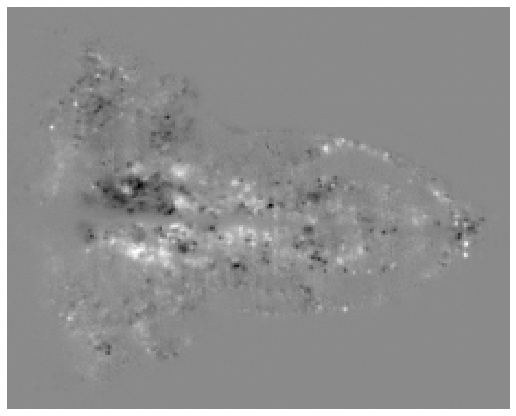

In [56]:
draw_component(timeSeries_features[:,5])

In [46]:
from sklearn.decomposition import PCA

preprocessor = PCA()
preprocessor.fit(timeSeries_features)

PCA(copy=True, n_components=None, whiten=False)

In [47]:
timeSeries_pca = preprocessor.transform(timeSeries_features)

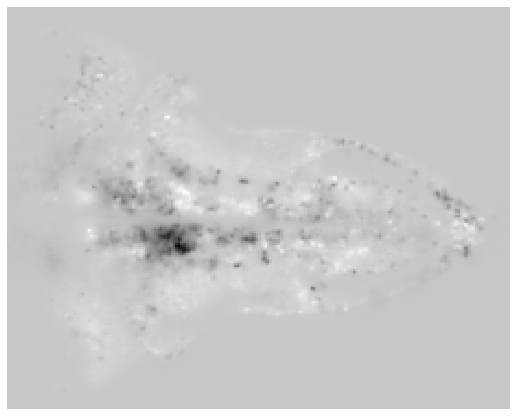

In [48]:
draw_component(timeSeries_pca[:,1])

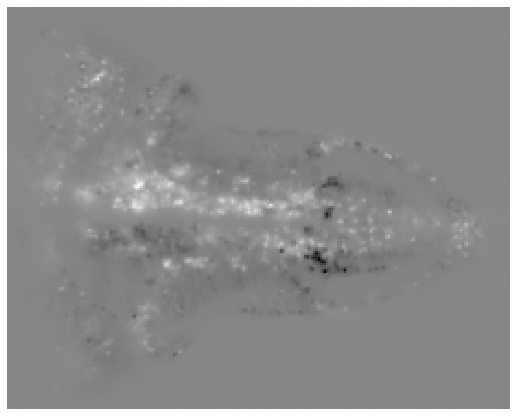

In [49]:
draw_component(timeSeries_pca[:,2])

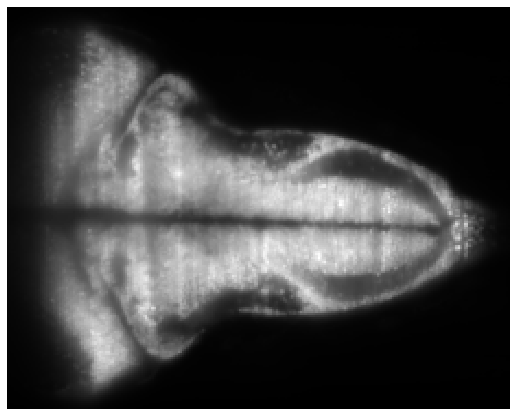

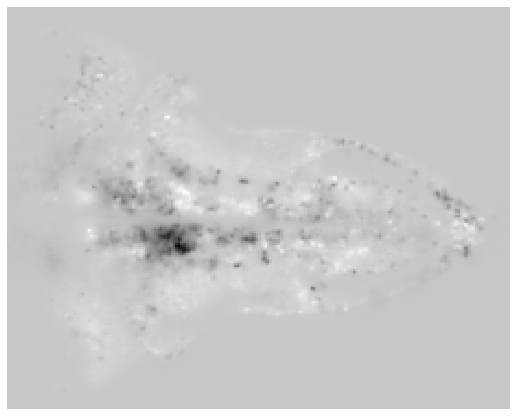

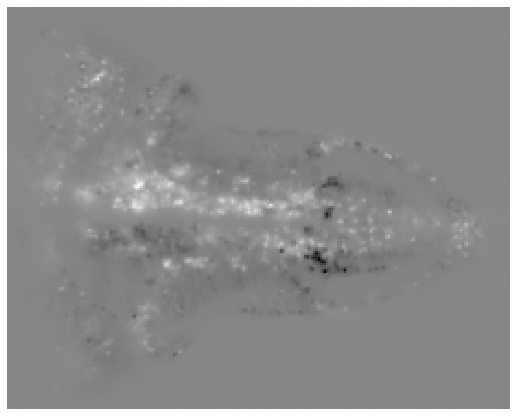

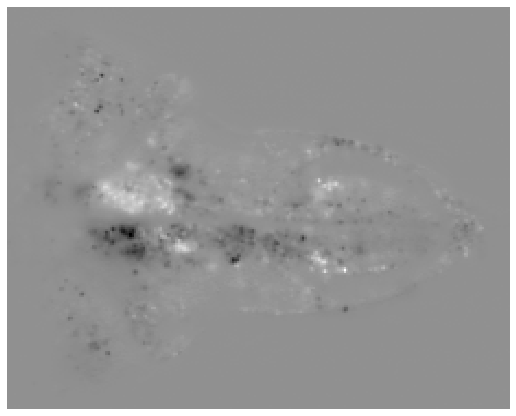

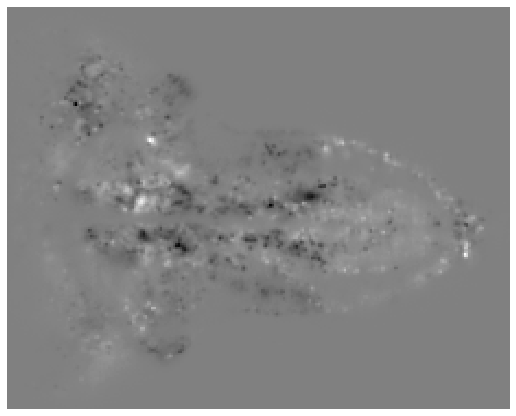

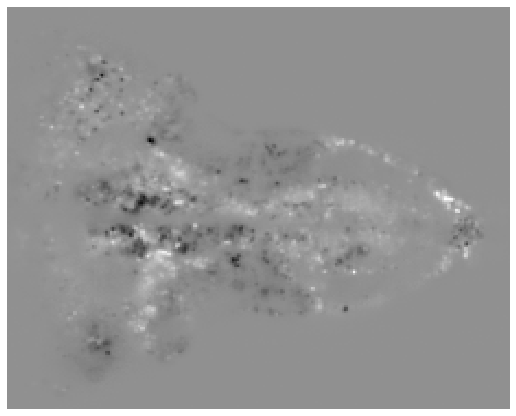

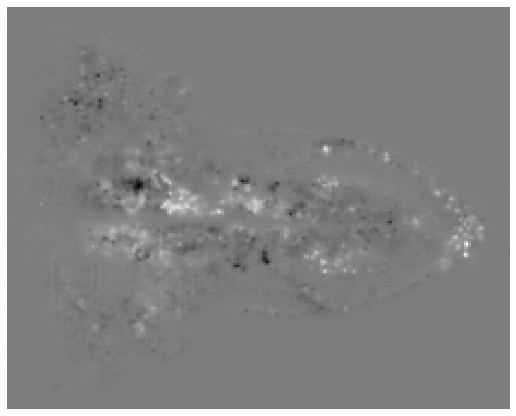

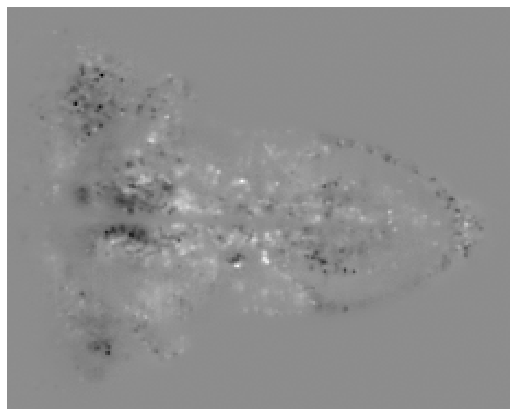

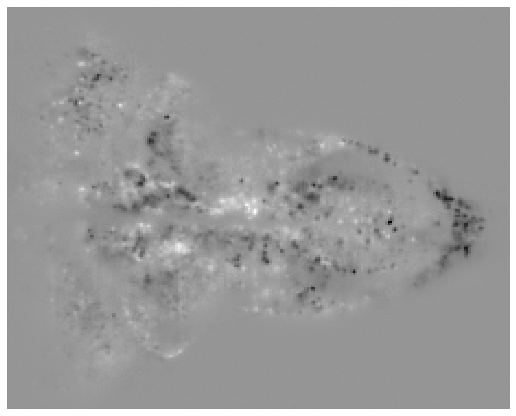

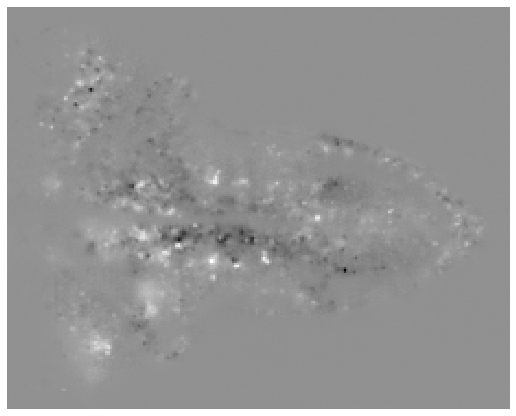

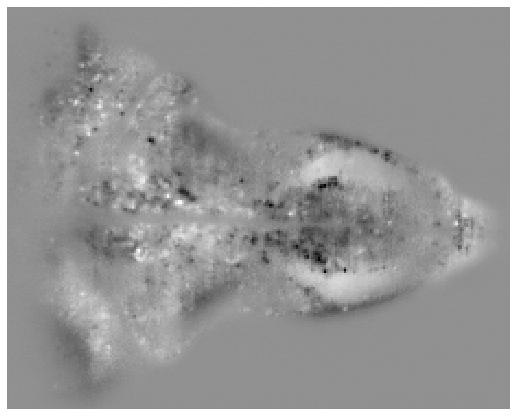

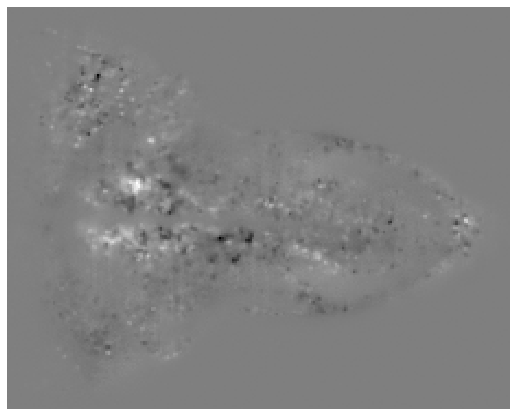

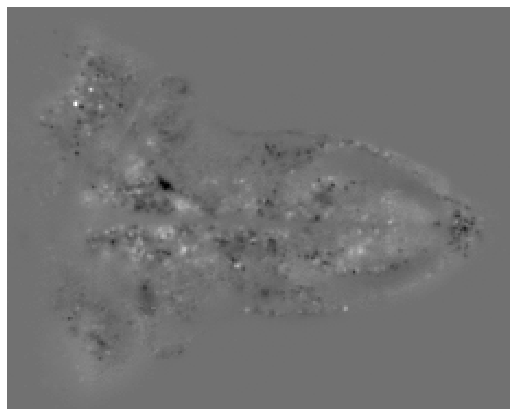

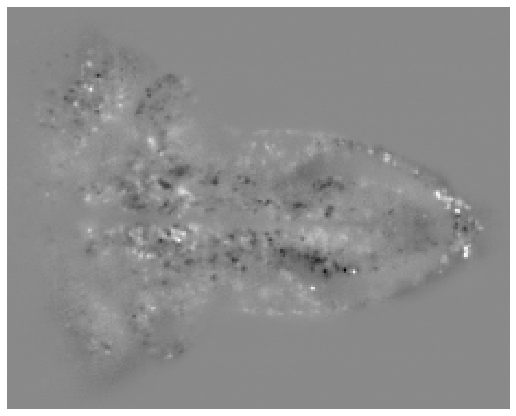

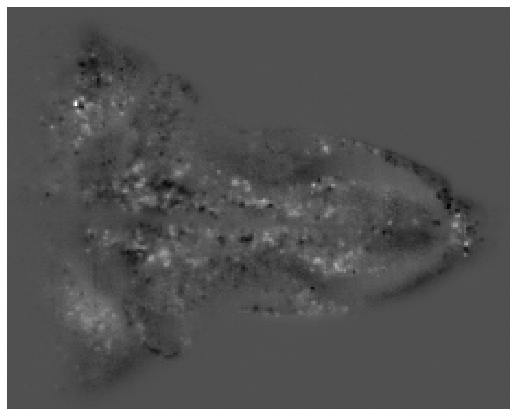

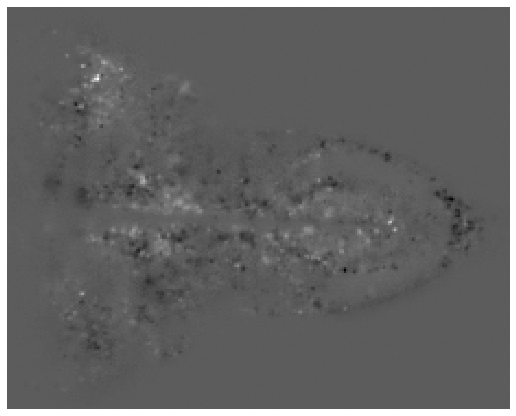

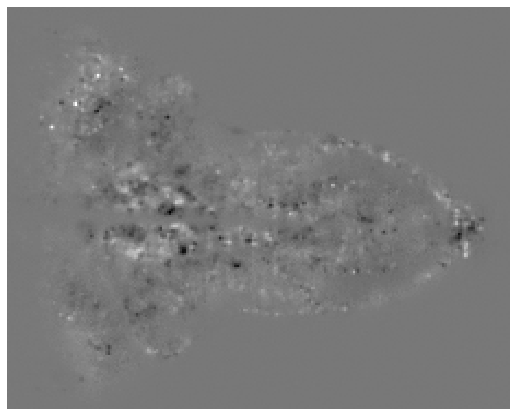

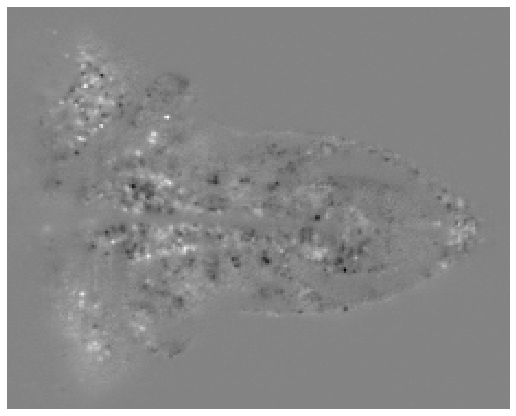

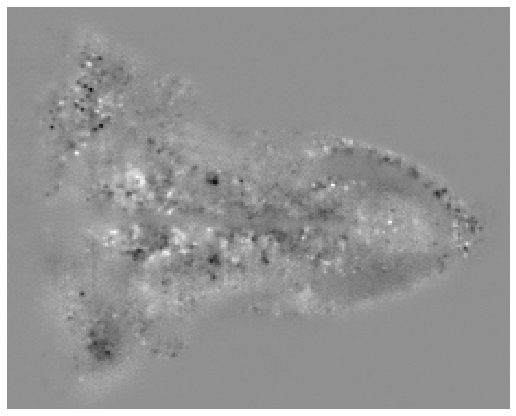

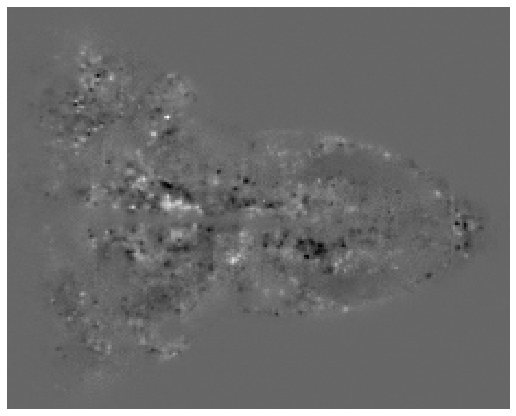

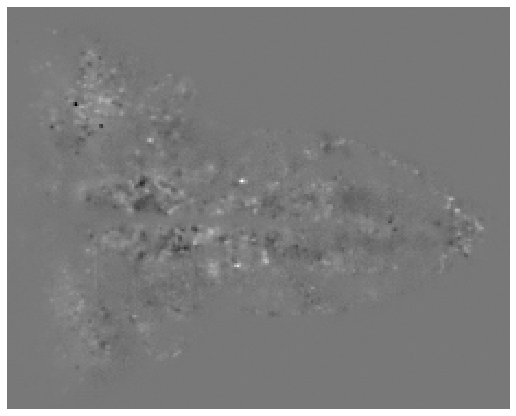

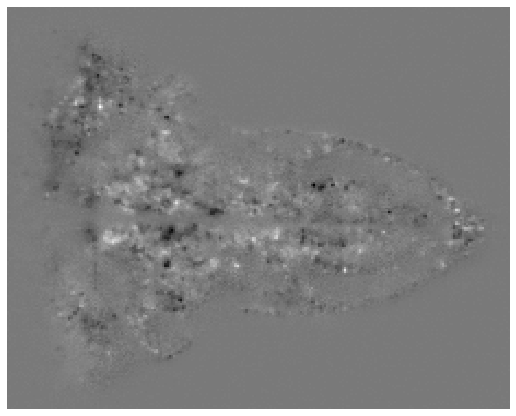

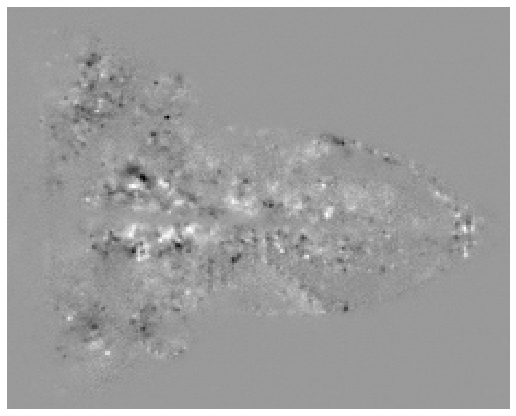

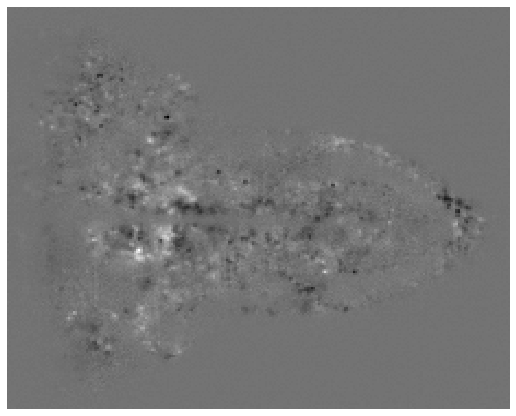

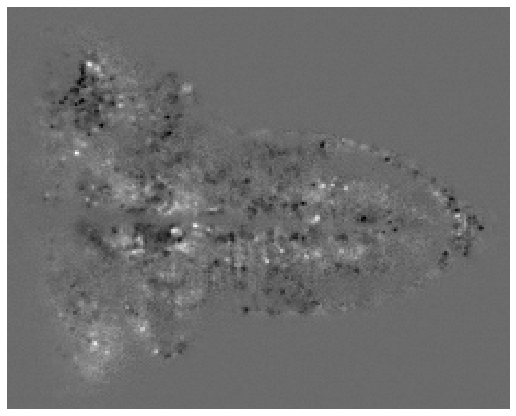

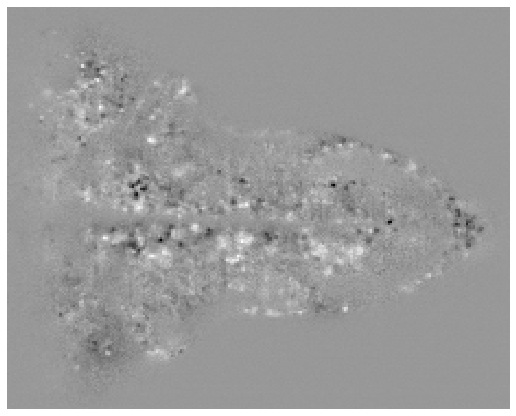

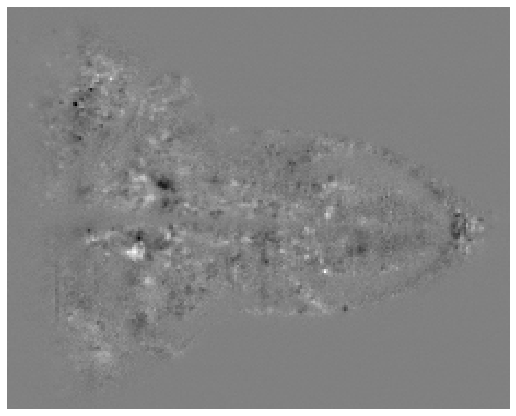

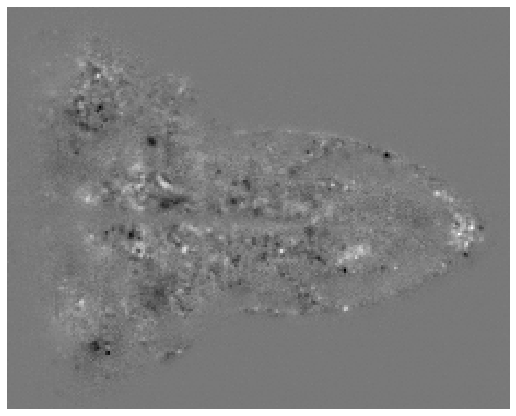

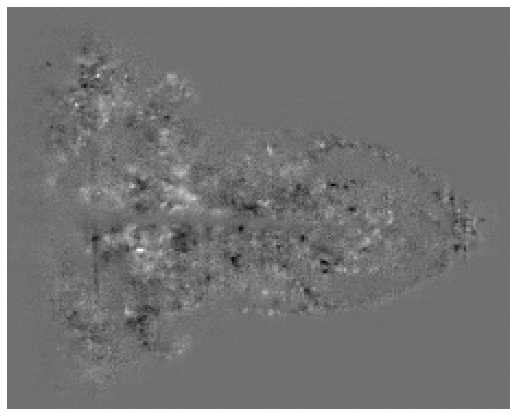

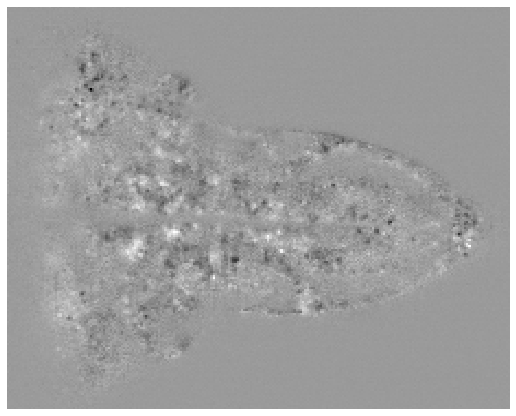

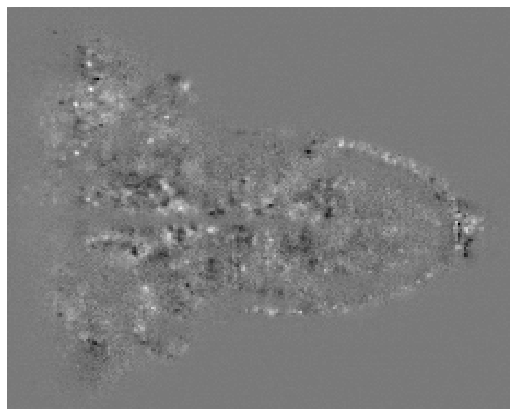

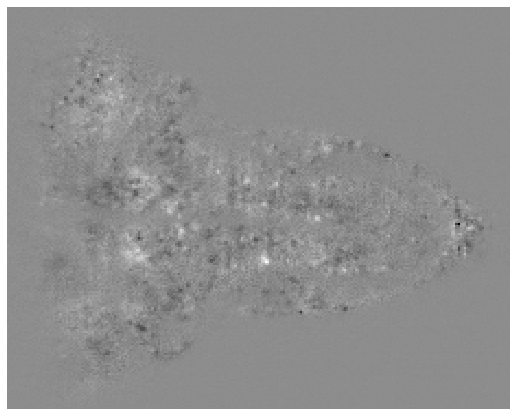

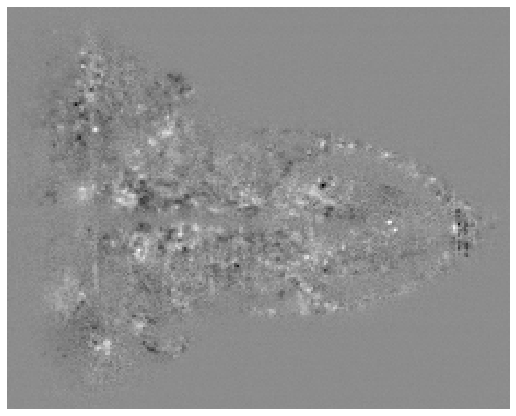

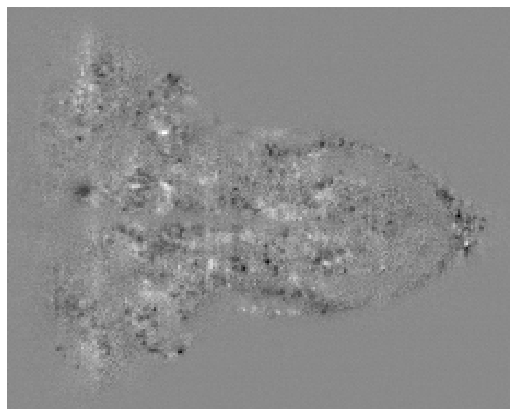

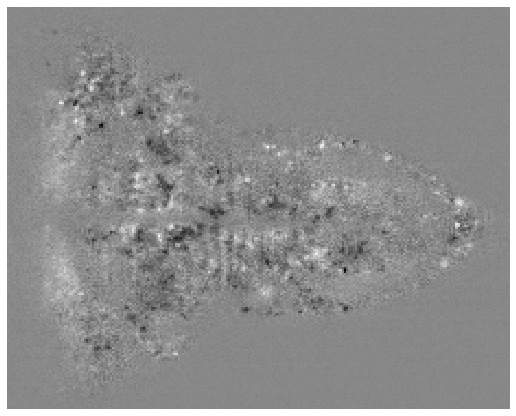

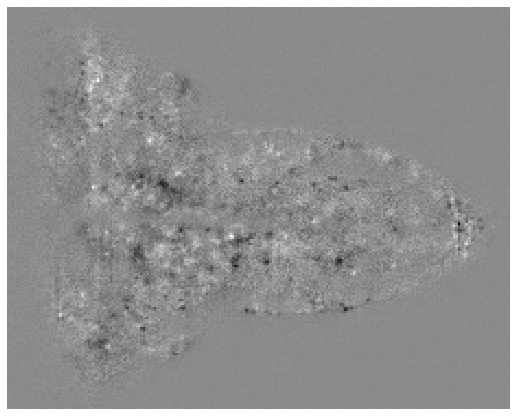

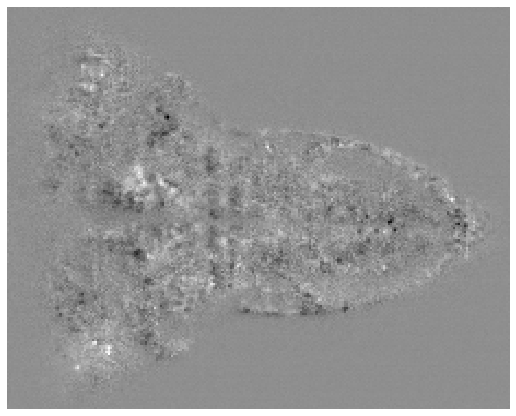

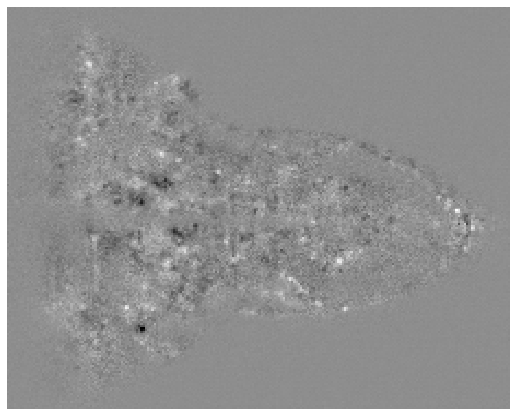

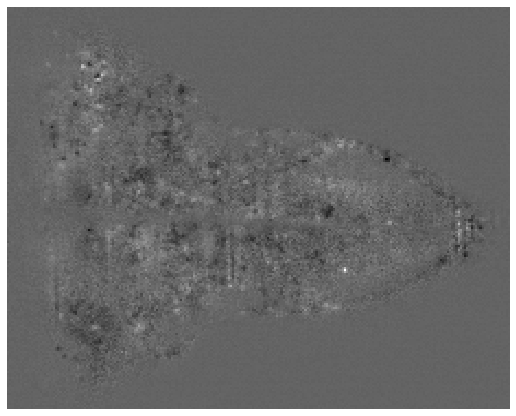

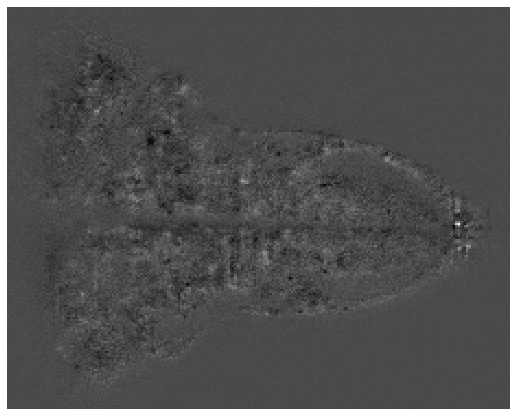

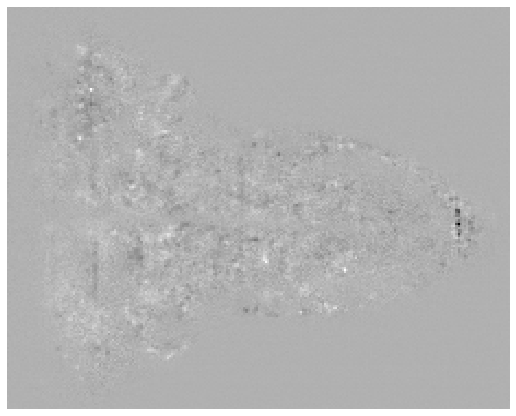

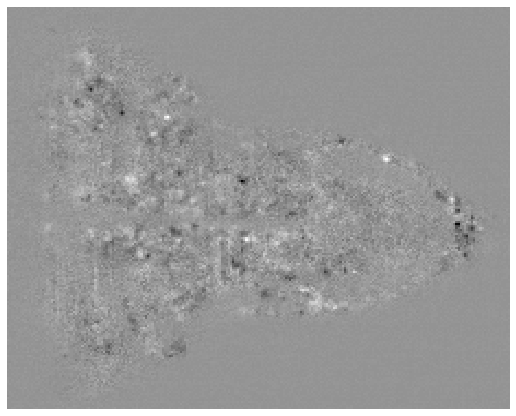

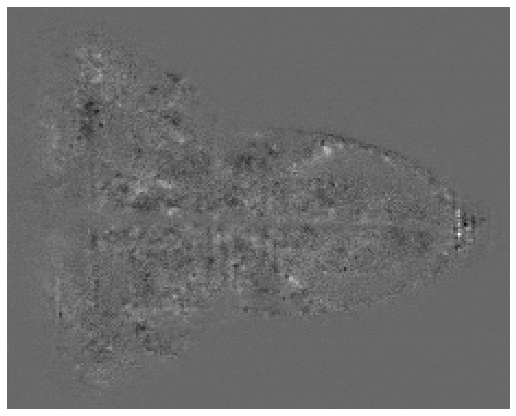

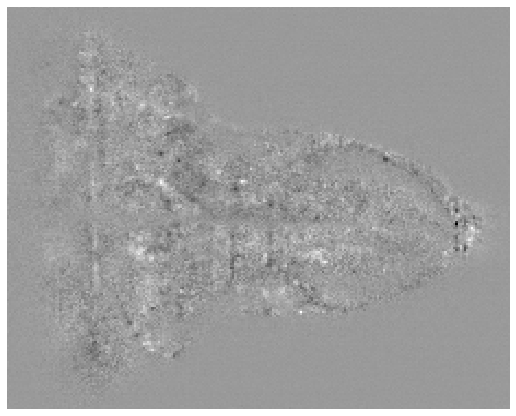

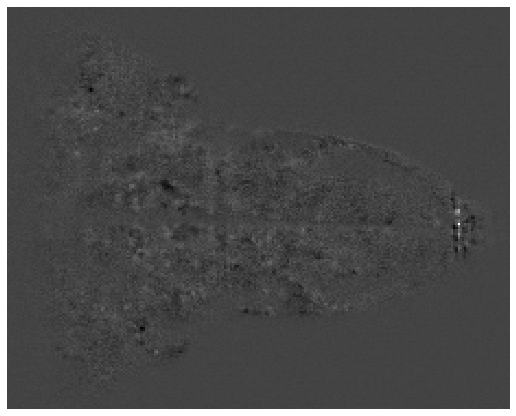

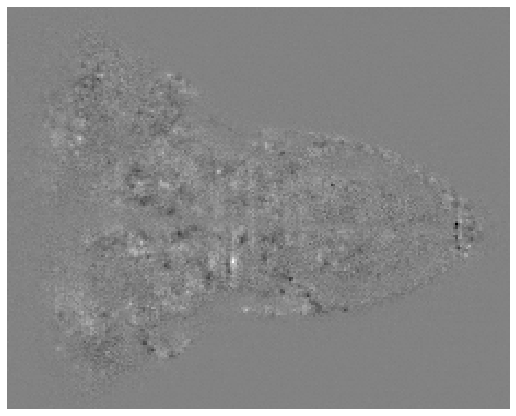

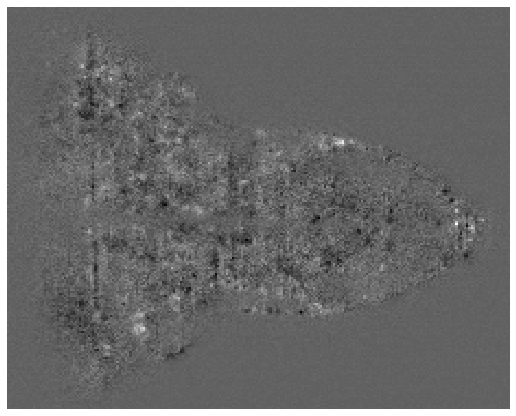

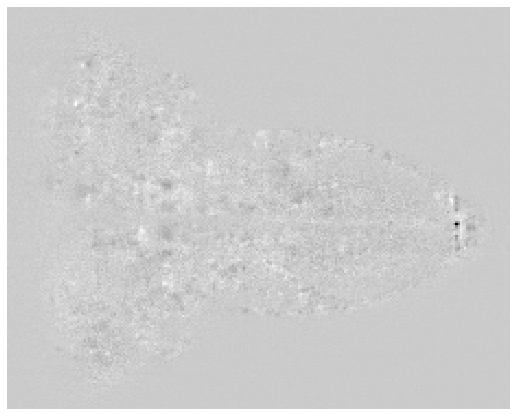

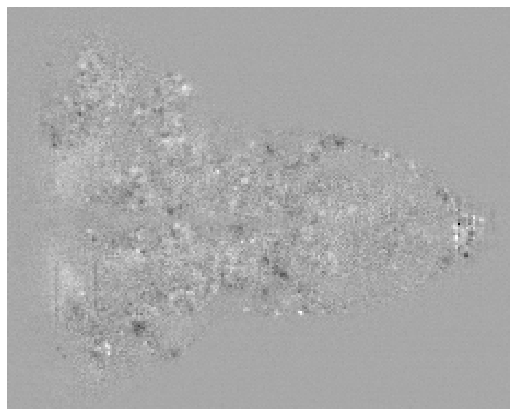

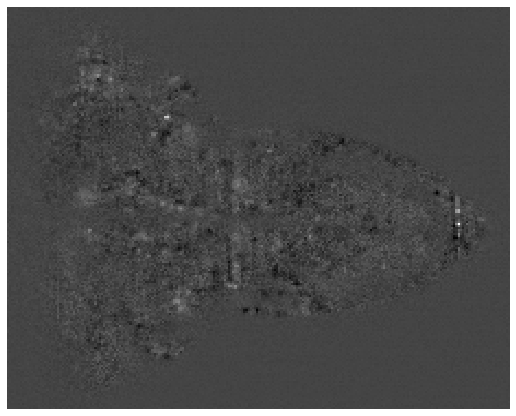

In [51]:
for i in range(50):
    draw_component(timeSeries_pca[:,i])

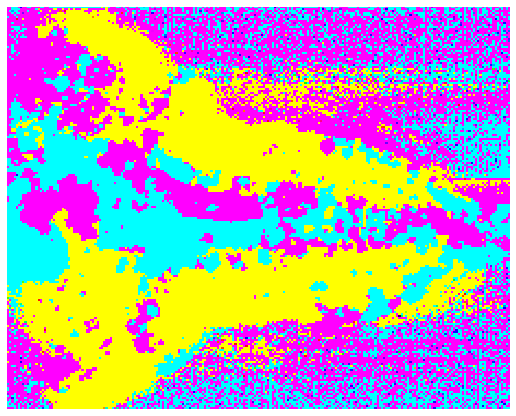

In [50]:
draw_components(timeSeries_pca[:,1],timeSeries_pca[:,2])